In [38]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error







# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree


# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score


from sklearn.preprocessing import StandardScaler

from tqdm import tqdm


# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')
import os 
import sys








# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score


from sklearn.preprocessing import StandardScaler

from tqdm import tqdm


# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')


sys.path.append(os.path.abspath("src"))   
import soporte_regresion as f

In [39]:
df_reg=pd.read_csv("datos\online_shoppers_intention_clase_nonulls_estan_sinout_encoding.csv", index_col=0).reset_index(drop=True)

In [40]:
df_reg.head()

,AdministrativeDuration,Informational,InformationalDuration,ProductRelatedDuration,ExitRates,PageValues,Administrative_knn,ProductRelated_knn,BounceRates_knn,VisitorType,OperatingSystems,Browser,Region,Month,TrafficType
0,-0.03,0.00,0.00,-0.47,4.90,0.00,-0.26,-0.57,11.46,2.00,3.00,5.08,4.82,1.07,3.04
1,-0.03,0.00,0.00,-0.42,2.10,0.00,-0.26,-0.53,-0.22,2.00,2.00,5.02,5.07,0.97,7.01
2,-0.03,0.00,0.00,-0.47,4.90,0.00,-0.26,-0.57,-0.22,2.00,1.00,4.76,8.75,0.91,3.08
3,-0.03,0.00,0.00,-0.47,3.22,0.00,-0.05,-0.53,2.70,2.00,4.00,5.02,5.18,0.97,6.55
4,-0.03,0.00,0.00,0.02,0.70,0.00,-0.26,-0.27,0.95,2.00,4.00,2.28,5.07,0.97,6.55


LO PRIMERO ES DIVIDIR EN VARIABLE RESPUESTA Y PREDICTORA

In [41]:
x= df_reg.drop(columns="PageValues")
y= df_reg[["PageValues"]]   #doble corchete para quedarte con un dataframe

In [42]:
x.head()

,AdministrativeDuration,Informational,InformationalDuration,ProductRelatedDuration,ExitRates,Administrative_knn,ProductRelated_knn,BounceRates_knn,VisitorType,OperatingSystems,Browser,Region,Month,TrafficType
0,-0.03,0.00,0.00,-0.47,4.90,-0.26,-0.57,11.46,2.00,3.00,5.08,4.82,1.07,3.04
1,-0.03,0.00,0.00,-0.42,2.10,-0.26,-0.53,-0.22,2.00,2.00,5.02,5.07,0.97,7.01
2,-0.03,0.00,0.00,-0.47,4.90,-0.26,-0.57,-0.22,2.00,1.00,4.76,8.75,0.91,3.08
3,-0.03,0.00,0.00,-0.47,3.22,-0.05,-0.53,2.70,2.00,4.00,5.02,5.18,0.97,6.55
4,-0.03,0.00,0.00,0.02,0.70,-0.26,-0.27,0.95,2.00,4.00,2.28,5.07,0.97,6.55


In [43]:
y.head()

,PageValues
0,0.00
1,0.00
2,0.00
3,0.00
4,0.00


LO SEGUNDO ES DIVIDIR LOS DATOS EN TRAIN Y TEST (PARA PODER ENTRENAR Y EVALUAR CUANTO SE EQUIVOCA)

In [44]:
x_train,x_test,y_train,y_test= train_test_split(x, y, train_size=0.7, random_state=42, shuffle=True)    #shuffle es para que no coja el 70 y el 30 en orden
modelo_lineal= LinearRegression()
modelo_lineal.fit(x_train, y_train)   #aquí ya ha aprendido

LinearRegression()

In [45]:
y_test_pred=modelo_lineal.predict(x_test)        #con esto predice un pagevalues

In [46]:
y_train_pred= modelo_lineal.predict(x_train)

#### MÉTRICAS  
- RMSE (penaliza más los errores respecto al MAE)  
    - raiz de la suma de las diferencias de los errores al cuadrado   
      
- MAE (lo que se equivoca de media)  
    - (y(predicho) - y)/ n   
      
- R2  
    - Medida de ajuste de mi modelo, que proporción de la varianza de la variable dependiente queda explicada por mi modelo (Como de buena es mi elección de variables independientes)
      
- MSE  
    - suma de las diferencias de los errores al cuadrado  

### Problemas que se pueden dar:   
#### Over fitting:   
Cuando el modelo ha aprendido muy bien los datos del train pero resulta que cuando le pasas al test no da ni una  
#### Under fitting:  
Cuando el modelo no ha podido aprender bien los datos en train y por eso no da ni una en el test  
### Como identificarlo?  
### Comparando el RMSE y R2 entre el train y el test     
##### Over fitting  
RMSE train muy bajo
RMSE test muy alto  
#### Se trata:  
Aumentando la muestra o diminuyendo las variables independientes
##### Under fitting  
RMSE train muy alto
RMSE test muy alto (aunuqe puede ser más bajo porque ya ha aprendido)
#### Se trata:  
Aumentando la muestra o aumentando las variables independientes

***Generamos un diccionario para que nos saque las metricas para train y test para comprobar***

In [47]:
metricas = {
    'train': {
        'r2_score': r2_score(y_train, y_train_pred),
        'MAE': mean_absolute_error(y_train, y_train_pred),
        'MSE': mean_squared_error(y_train, y_train_pred),
        'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred))
    },
    'test': {
        'r2_score': r2_score(y_test, y_test_pred),
        'MAE': mean_absolute_error(y_test, y_test_pred),
        'MSE': mean_squared_error(y_test, y_test_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))

    }
}

In [48]:
y_test_pred[:3]

array([[6.08809217],
       [6.65351754],
       [7.27723389]])

In [49]:
y_train_pred[:3]

array([[ 8.34938432],
       [-2.30430536],
       [ 3.89815644]])

In [50]:
pd.DataFrame(metricas)

,train,test
r2_score,0.05,0.05
MAE,8.13,8.01
MSE,261.52,240.62
RMSE,16.17,15.51


Dado que coinciden bastante las RMSE, no se está dando ni over fitting ni under fitting

# Esto es solo una vez pero para eliminar sesgos se debería hacer varias veces

## Métodos:  
  
**K-Fold (Cross-validation)**  
Divide nuestros datos en k paquetitos homogéneos (que eligimos nosotros) y deja un paquete para el test (ese paquete de test va cambiando).
- Ej:  
    Si k=5 y tengo 100 datos,divide en 5 paquetes de 20 y la primera iteración cogera el paquete 1 como test y el resto como train, en la siguiente iteración cogerá el 2º paquete como test y el resto como train (aprende con todods los datos)   


**Leave-One-Out (Cross-validation)**  
La K será el número total de observaciones con lo que cada paquetito es cada fila  
- No usarla con muchos datos aunque es muy precisa 

***K-Fold***

In [51]:
f.metricas(y_train, y_train_pred, y_test, y_test_pred)

,train,test
r2_score,0.05,0.05
MAE,8.13,8.01
MSE,261.52,240.62
RMSE,16.17,15.51


In [52]:
kf= KFold(n_splits=5,
          shuffle=True,
          random_state=42)

score_r2= cross_val_score(modelo_lineal, x, y, cv=kf, scoring= "r2")
np.mean(score_r2)

np.float64(0.05073104684239045)

In [53]:
score_mae= cross_val_score(modelo_lineal, x, y, cv=kf, scoring= "neg_mean_absolute_error")
abs(np.mean(score_mae))

np.float64(8.089521061697038)

In [54]:
score_mse= cross_val_score(modelo_lineal, x, y, cv=kf, scoring= "neg_mean_squared_error")
abs(np.mean(score_mse))

np.float64(255.88384293244866)

In [55]:
score_rmse= cross_val_score(modelo_lineal, x, y, cv=kf, scoring= "neg_root_mean_squared_error")
abs(np.mean(score_rmse))

np.float64(15.97187565582368)

In [56]:
# kf= KFold(n_splits=10000,
#           shuffle=True,
#           random_state=42)

# score_r2= cross_val_score(modelo_lineal, x, y, cv=kf, scoring= "r2")
# np.mean(score_r2)

In [57]:
# score_rmse= cross_val_score(modelo_lineal, x, y, cv=kf, scoring= "neg_root_mean_squared_error")
# abs(np.mean(score_rmse))

Cuantas más iteraciones más probabilidades de que seleccione el mismo paquete sobre el que aprender con lo que hay más riesgo de over fitting (porque es seleccion aleatoria)

***Leave-One-Out***

In [58]:
# loo= LeaveOneOut()
# scores=[]

# for indice in range(df_reg.shape[0]):
#     x_test_cv = x.iloc[[indice]]
#     x_train_cv= x.drop(index= indice)
#     y_test_cv = y.iloc[indice,:]
#     y_train_cv= y.drop(index= indice)

#     modelo_lineal.fit(x_train_cv, y_train_cv)
#     y_pred= modelo_lineal.predict(x_test_cv)
#     rmse= np.sqrt(mean_squared_error(y_test_cv, y_pred))
#     scores.append(rmse)
#     # print(f"Indice de xtrain {x_test_cv.index}") para comprobar si esta bien hecho
# np.mean(scores)


**Como seleccionar que variables independientes eliminar si sucede over fitting**

In [59]:
pd.options.display.float_format = "{:,.2f}".format  #para quitar la notación cientifica
df_coefs=pd.DataFrame(modelo_lineal.coef_, columns= x.columns).T
df_coefs.sort_values(by=0, key= abs, ascending=False)    #para que ordene según la importancia

,0
ExitRates,-2.67
VisitorType,-2.15
ProductRelatedDuration,1.00
OperatingSystems,-0.92
ProductRelated_knn,-0.67
BounceRates_knn,0.65
Region,0.62
Browser,0.48
Month,0.45
Administrative_knn,0.44


recursive_feature_elimination

# EN EL CASO DE QUE NO SE AJUSTE BIEN UNA REGRESIÓN LINEAL PODEMOS USAR OTRAS ALTERNATIVAS

## **DECISION TREE**  
Separa los datos en nodos y luego hace la media en el nodo final de la variable dependiente para los datos que se encuentran en ese nodo y cuando tenga que predecir, si el dato acaba en ese nodo, se le aplicará esa media como valor de su variable dependiente.  
   
***Para elegir el mejor árbol de decisión (conformado de unas variables independientes concretas)***   
Calcula la suma de los errores al cuadrado dividido entre n del nodo final de cada arbol y compara ese error y se queda con el que tenga el error mínimo
  
- Si hay mucha profundidad, los nodos finales van a ser tan específicos que se va a dar over fitting
  
***Como decirle que pare de dividir para evitar el Over Fitting***  
- max_depth (profundida máxima del árbol)
- min_sample_split (numero de datos minimo en el nodo (madre) para que se pueda dividir)  
- min_sample_leaf (numero de datos minimo que tienen que tener los nodos(hijos) en los que me divido) 
- max_leaf_nodes (numero maximo de nodos que quiero que tenga mi arbol)  
- max_features (numero máximo de variables independientes que queremos)

In [60]:
modelo_arbol= DecisionTreeRegressor()         #max_depth=3, max_leaf_nodes=15, min_samples_split=150, min_samples_leaf= 25, random_state=42
modelo_arbol.fit(x_train, y_train)
y_pred_test_arb= modelo_arbol.predict(x_test)
y_pred_train_arb= modelo_arbol.predict(x_train)
df_metricas_arbol= f.metricas(y_train, y_pred_train_arb, y_test, y_pred_test_arb)
df_metricas_arbol

,train,test
r2_score,1.00,-0.99
MAE,0.00,8.38
MSE,0.00,504.36
RMSE,0.00,22.46


In [61]:
# plot_tree(decision_tree=modelo_arbol, feature_names=x.columns, filled=True)

In [62]:
# Parámetros a evaluar
params_arbol = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [10, 50, 100, 200],
    'min_samples_leaf': [10, 50, 100, 200],
    'max_leaf_nodes': [4, 6, 8, 10, 20, 30]
}

grid_search_arbol=GridSearchCV(DecisionTreeRegressor(), param_grid=params_arbol, cv=5, scoring= "neg_mean_squared_error", n_jobs=-1)

grid_search_arbol.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'max_leaf_nodes': [4, 6, 8, 10, 20, 30],
                         'min_samples_leaf': [10, 50, 100, 200],
                         'min_samples_split': [10, 50, 100, 200]},
             scoring='neg_mean_squared_error')

In [63]:
modelo_final_arbol=grid_search_arbol.best_estimator_ #para ver el mejor arbol que me ha elegido
modelo_final_arbol

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=30, min_samples_leaf=10,
                      min_samples_split=200)

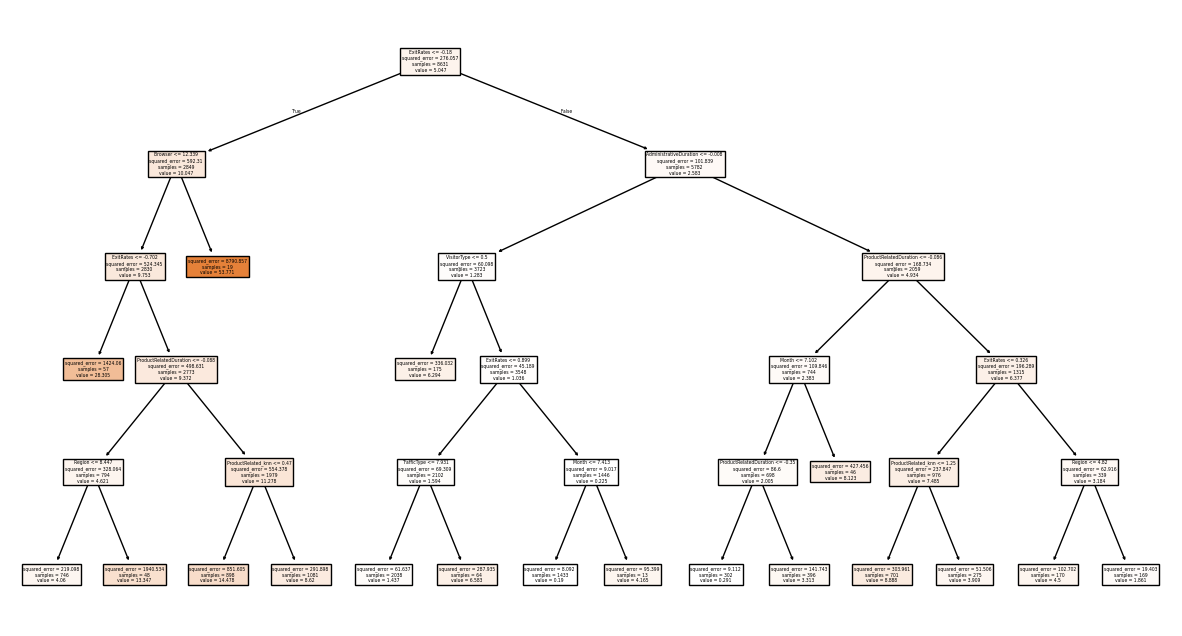

In [64]:
plt.figure(figsize=(15,8))
plot_tree(decision_tree=modelo_final_arbol, feature_names=x.columns, filled=True);

AHORA QUE SABEMOS QUE LA MEJOR DEPTH ES 5 ESTARÍA BIEN COMPARAR LA 4,5 Y 6 PARA VER SI SIGUE SIENDO LA MEJOR EL 5 

### Vamos a graficarlo porque así se entienden mejor

In [65]:
df_resultados_arbol=pd.DataFrame(grid_search_arbol.cv_results_)

In [66]:
df_resultados_arbol.sort_values(by= "rank_test_score", ascending=True).head()    #aquí podemos ver cual nos ha dado como mejor modelo (el 1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
179,0.04,0.00,0.00,0.00,5,30,10,200,"{'max_depth': 5, 'max_leaf_nodes': 30, 'min_sa...",-231.83,-243.59,-307.31,-252.51,-230.51,-253.15,28.26,1
163,0.05,0.01,0.00,0.00,5,20,10,200,"{'max_depth': 5, 'max_leaf_nodes': 20, 'min_sa...",-231.83,-244.23,-307.31,-252.51,-230.51,-253.28,28.21,2
178,0.05,0.00,0.00,0.00,5,30,10,100,"{'max_depth': 5, 'max_leaf_nodes': 30, 'min_sa...",-233.25,-244.88,-307.05,-251.67,-230.79,-253.53,27.83,3
177,0.05,0.01,0.00,0.00,5,30,10,50,"{'max_depth': 5, 'max_leaf_nodes': 30, 'min_sa...",-233.25,-244.88,-307.09,-250.41,-232.08,-253.54,27.66,4
161,0.05,0.00,0.01,0.00,5,20,10,50,"{'max_depth': 5, 'max_leaf_nodes': 20, 'min_sa...",-233.04,-246.88,-307.07,-250.38,-231.95,-253.86,27.59,5


In [67]:
df_resultados_arbol.shape   #no da el número de modelos que ha generado el arbol 

(384, 17)

In [68]:
df_resultados_arbol_filtrado=df_resultados_arbol.filter(like= "param").drop(columns= "params")
df_resultados_arbol_filtrado["MSE"]= df_resultados_arbol["mean_test_score"]
df_resultados_arbol_filtrado.head()


,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,MSE
0,3,4,10,10,-263.36
1,3,4,10,50,-263.36
2,3,4,10,100,-263.36
3,3,4,10,200,-263.36
4,3,4,50,10,-264.64


In [69]:
df_rmse_profun= np.sqrt(df_resultados_arbol_filtrado.groupby("param_max_depth")["MSE"].mean().abs()).reset_index()
df_rmse_profun

,param_max_depth,MSE
0,3,16.15
1,5,16.10
2,7,16.13
3,10,16.15


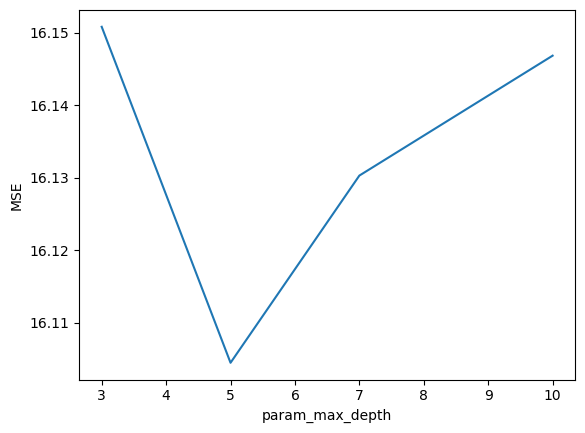

In [70]:
sns.lineplot(x= "param_max_depth", y = "MSE", data= df_rmse_profun);

In [71]:
# fig, axes= plt.subplots(nrows= 2, ncols=2, figsize= (10,15), sharey= True)
# axes= axes.flat

# for indice, col in enumerate(df_resultados_arbol_filtrado.columns[:-1]):
#     df_rmse_profun= np.sqrt(df_resultados_arbol_filtrado.groupby(col)["MSE"].mean().abs()).reset_index()
#     sns.lineplot(x= df_rmse_profun.index, y = df_rmse_profun.values, data= df_rmse_profun, ax= axes[indice])
#     axes[indice].grid()
#     axes[indice].set_title(col)
#     axes[indice].set_xlabel("")
# plt.tight_layout()

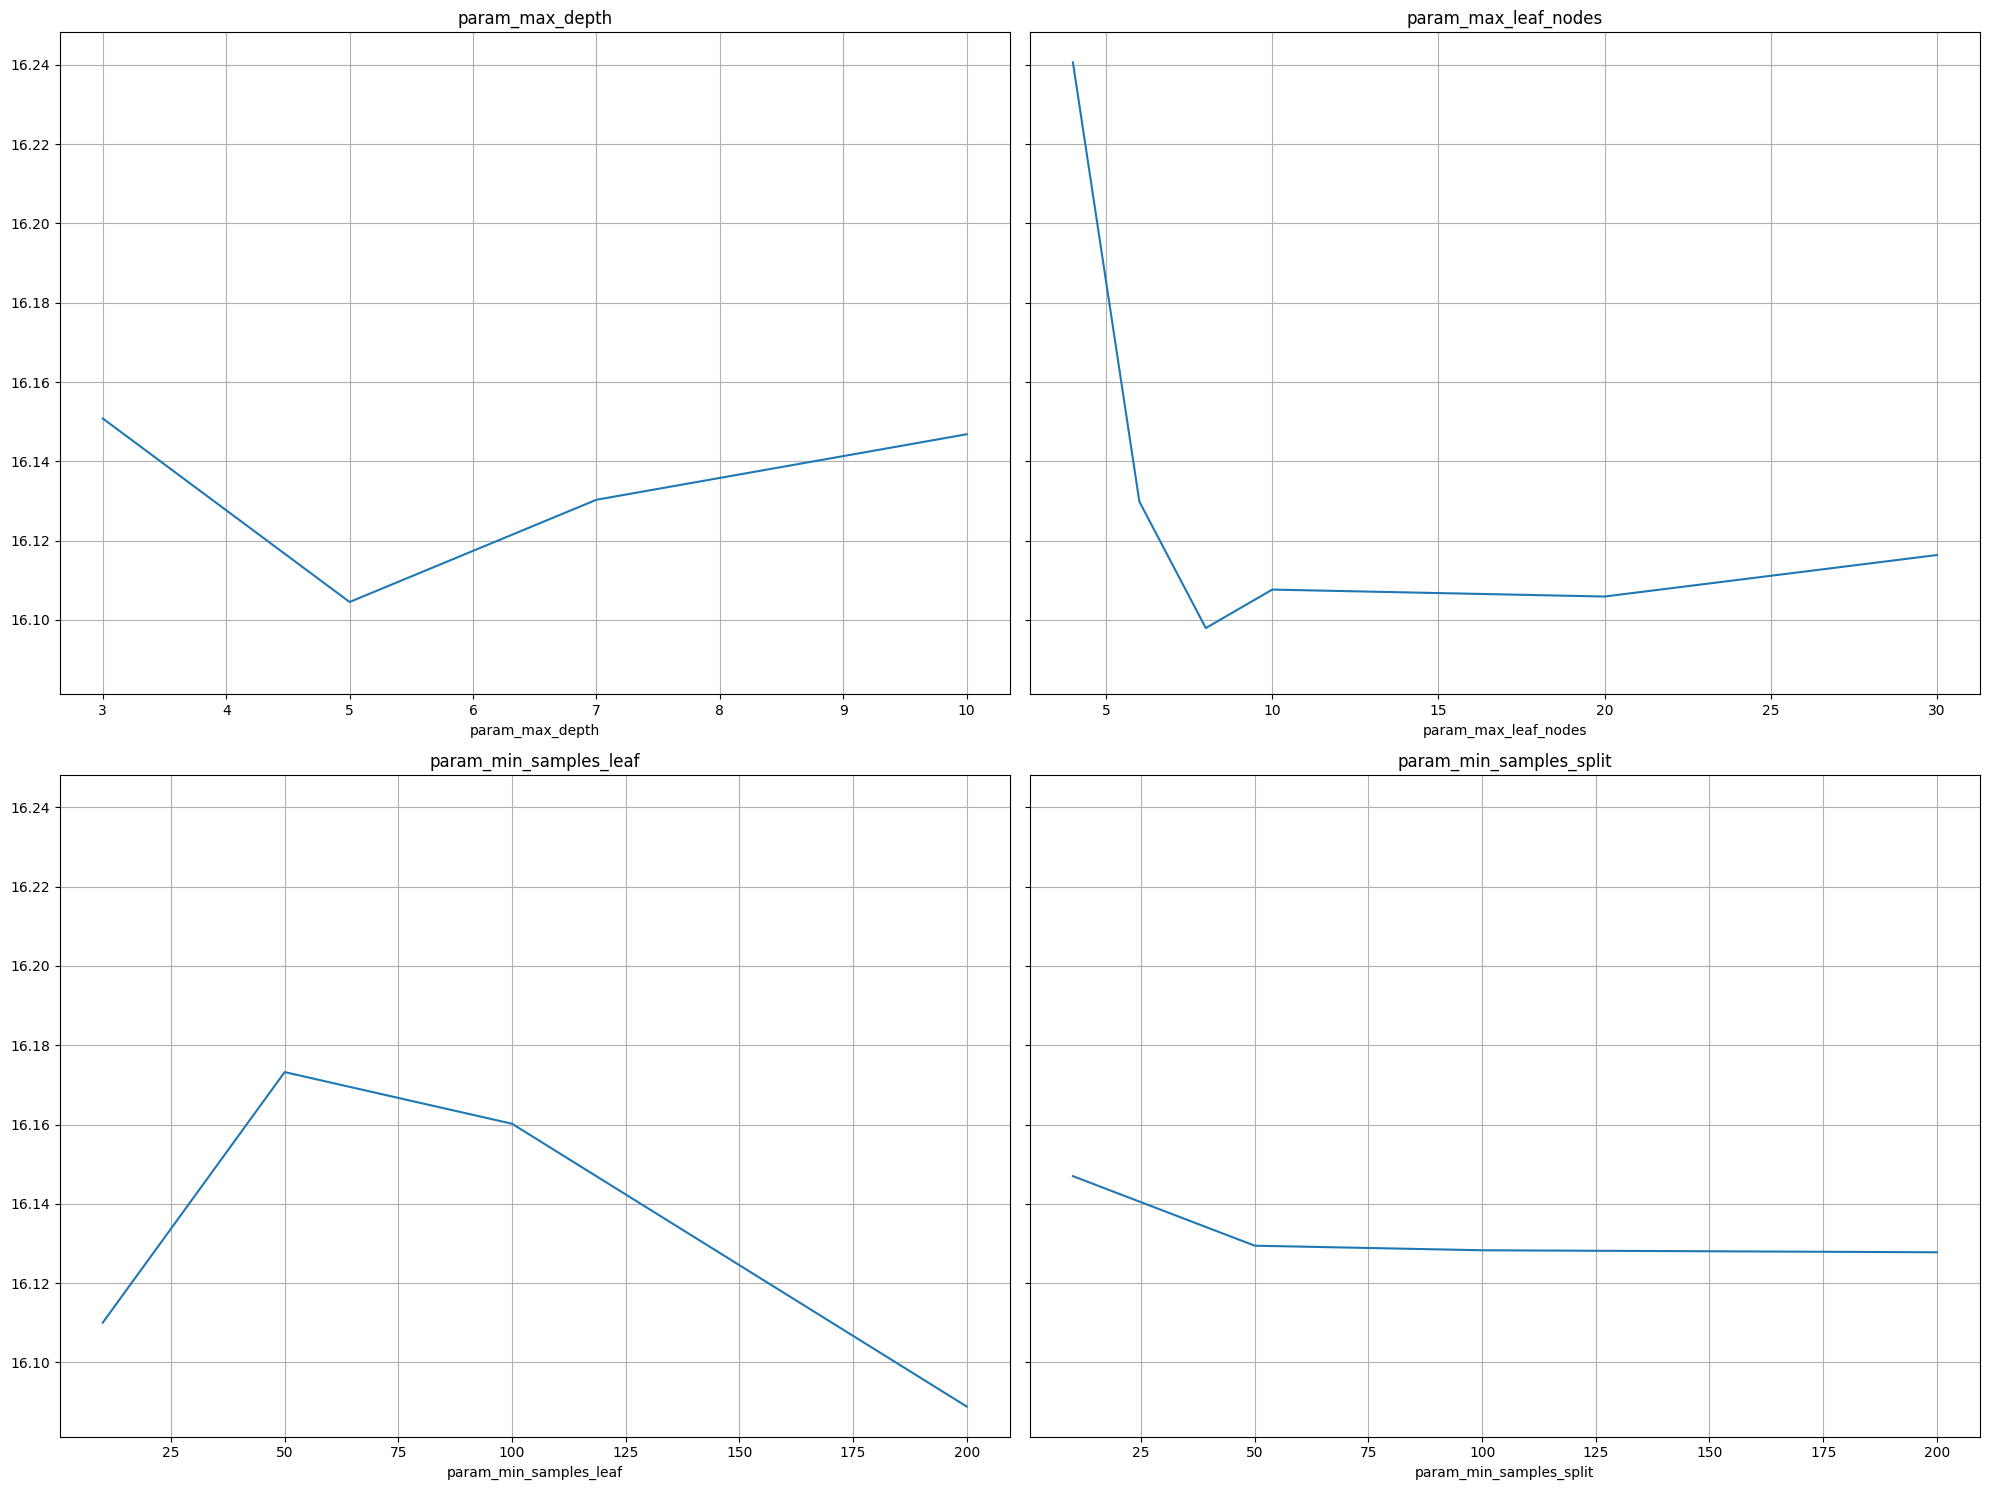

In [72]:

df_rmse_prof = np.sqrt(df_resultados_arbol_filtrado.groupby("param_max_depth")["MSE"].mean().abs())
df_rmse_prof = pd.DataFrame(df_rmse_prof).reset_index()

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(20, 15), sharey=True)
axes = axes.flat

for indice, column in enumerate(df_resultados_arbol_filtrado.columns[:-1]):
    df_rmse_col = np.sqrt(df_resultados_arbol_filtrado.groupby(column)["MSE"].mean().abs())
    sns.lineplot(x=df_rmse_col.index, y=df_rmse_col.values, ax=axes[indice])
    axes[indice].grid()
    axes[indice].set_title(column)
plt.tight_layout()
plt.show() 

In [73]:
pd.DataFrame(modelo_final_arbol.feature_importances_, columns= ["Importancia"], index= x.columns).sort_values(by = "Importancia", ascending=False)

,Importancia
ExitRates,0.52
Browser,0.14
ProductRelatedDuration,0.13
ProductRelated_knn,0.09
AdministrativeDuration,0.07
VisitorType,0.02
Region,0.02
Month,0.01
TrafficType,0.01
Informational,0.00


## **Modelos de Ensamble sirven para Regresión y Clasificación (Cuando no es lineal)**  
- **Bagging:**  
    - ***Random Forest***  
    Genera arboles *PARALELOS* en los que el primer nodo va siendo cada variable dejando árboles independientes. Esto hace que el RMSE medio quede más compensado si hay un árbol que genera mucho error. Si haces demasiados árboles y pocas variables independientes repetirá árboles.  
- **Boosting:**    
(Genera árboles *SECUENCIALES* en los que hace un árbol y al finalizarlo genera otro que ha aprendido de una pequeña parte de los errores del primer árbol, y el tercer árbol corrige otra parte pequeña de los errores del árbol 2 y así sucesivamente hasta que ya no queda casi error por corregir )   
  
    - ***Gradient Boosting***  
    Genera un arbol y obtiene sus errores, entonces su segundo arbol tomará como variable dependiente los errores del primero y esa predicción se mutiplica por la learning rate (porcentaje de los errores que se van a intentar arreglar) y ese error a solucionar se suma a la predicción inicial generando una nueva predicción, el tercer arbol toma como dependiente los errores de la nueva prediccion del arbol 2 y repite el proceso.  
       
    - ***XG Boost*** (Acepta nulos porque los gestiona)  

In [74]:
# Definimos un espacio de parámetros para optimizar
params_rf = {
    'n_estimators': [90,100,110],    #número de árboles que queremos que haga
    'max_features': [2,4,6,8,10,13],
    'max_depth': [4, 5, 6, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [3,4,5,6], 
    'max_leaf_nodes': [25, 30, 35, 40]
}

modelo_rf= RandomForestRegressor(random_state=42, bootstrap=True)    #bootstrap es para que haga un muestreo con remplazo (hace que dentro de distintos árboles te pueda coger el mismo dato)
grid_search_rf= GridSearchCV(modelo_rf,
                             params_rf,
                             cv=3,
                             scoring= "neg_mean_squared_error",
                             n_jobs=-1)

grid_search_rf.fit(x_train,y_train["PageValues"].values)   #esta puesto así porque se necesita un array de una dimension
modelo_final_rf= grid_search_rf.best_estimator_
modelo_final_rf

RandomForestRegressor(max_depth=6, max_features=6, max_leaf_nodes=35,
                      min_samples_leaf=3, n_estimators=110, random_state=42)

In [75]:
y_pred_test_rf=modelo_final_rf.predict(x_test)
y_pred_train_rf=modelo_final_rf.predict(x_train)

In [76]:
df_metricas_rf= f.metricas(y_train,y_pred_train_rf, y_test , y_pred_test_rf)
df_metricas_rf

,train,test
r2_score,0.23,0.11
MAE,6.87,7.03
MSE,213.78,227.04
RMSE,14.62,15.07


Aunque RMSE no muestra over fitting el r2 si que lo muestra por ello,

In [77]:
df_importancia=pd.DataFrame(modelo_final_rf.feature_importances_, columns= ["Importancia"], index= x.columns).sort_values(by= "Importancia", ascending=False)
df_importancia

,Importancia
ExitRates,0.26
ProductRelatedDuration,0.15
Browser,0.11
ProductRelated_knn,0.09
AdministrativeDuration,0.07
Region,0.07
TrafficType,0.07
VisitorType,0.05
Month,0.05
Administrative_knn,0.03


<Axes: xlabel='Importancia', ylabel='None'>

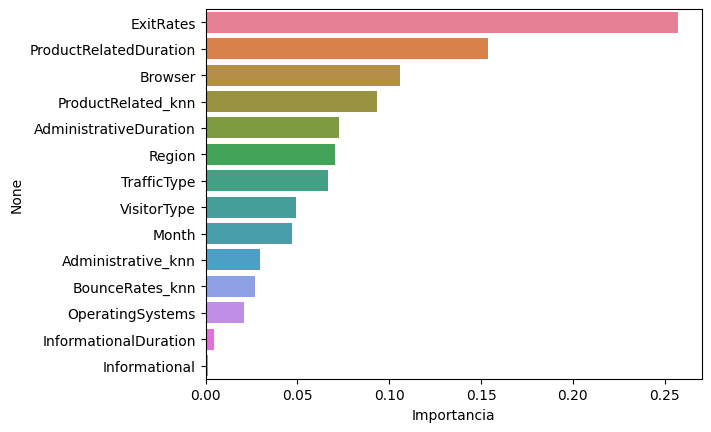

In [78]:
sns.barplot(x="Importancia", y= df_importancia.index, hue=df_importancia.index, data= df_importancia)

In [81]:
x_train_reducida=x_train.drop(columns="Informational")
x_test_reducida=x_test.drop(columns="Informational")

### *GRADIENT BOOSTING*

In [ ]:
# modelo_gb= GradientBoostingRegressor()

# params_gb={    
#     'n_estimators': [90,100,110],    #número de árboles que queremos que haga
#     'max_features': [2,4,6,8,10,13],
#     'learning_rate': [0.01, 0.03, 0.2],
#     'max_depth': [4, 5, 6, 7],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1,2,4], 
#     'max_leaf_nodes': [25, 30, 35, 40]
# }

### *XG BOOST*